## Stock Price Prediction using A Machine Learning Technique

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import yfinance as yf

In [8]:
# download the data
ticker = 'NVDA'
start = '2023-06-05'
end = '2024-06-05'

df = yf.download(ticker, start, end).reset_index()
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-05,389.089996,395.649994,387.070007,391.709991,391.584412,39609400
1,2023-06-06,388.299988,391.600006,381.480011,386.540009,386.416107,38872900
2,2023-06-07,389.149994,394.989990,373.559998,374.750000,374.668640,51199800
3,2023-06-08,377.239990,388.640015,375.049988,385.100006,385.016388,41777200
4,2023-06-09,390.369995,397.109985,385.670013,387.700012,387.615814,42722000
...,...,...,...,...,...,...,...
247,2024-05-29,1130.500000,1154.920044,1109.010010,1148.250000,1148.250000,55744200
248,2024-05-30,1146.500000,1158.189941,1096.630005,1105.000000,1105.000000,48735000
249,2024-05-31,1125.199951,1127.170044,1069.400024,1096.329956,1096.329956,61326300
250,2024-06-03,1136.209961,1150.000000,1120.030029,1150.000000,1150.000000,43839200


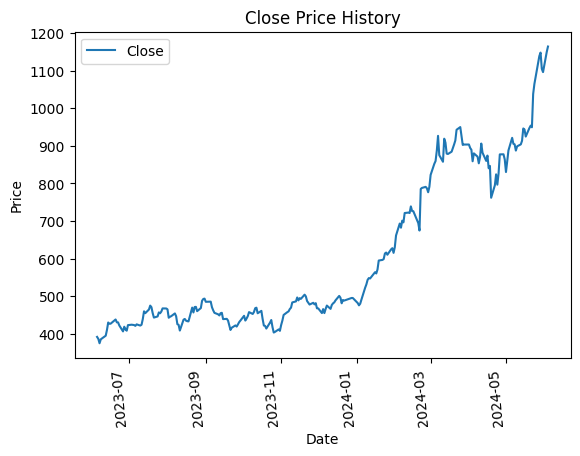

In [9]:
df.plot(x="Date", y="Close")
plt.xticks(rotation=95)
plt.title("Close Price History")
plt.ylabel("Price")
plt.show()

In [10]:
# Create the model
model =  RandomForestRegressor()

In [11]:
# Train the model
X = df[["Open", "High", "Low", "Volume"]]
X = X[:int(len(df)-2)]
y = df['Close'].shift(-1)
y = y[:int(len(df)-2)]
model.fit(X, y)

RandomForestRegressor()

In [12]:
# Test the model
print('The model score is :', model.score(X,y))

The model score is : 0.9981059138146443


In [16]:
# Make predictions
new_data = df[["Open", "High", "Low", "Volume"]].tail(2)[0:1]
prediction = model.predict(new_data)
print('The model predicts the last day price to be: ', prediction[0])
print('Actual Value:', df[['Close']].tail(1).values[0][0])

The model predicts the last day price to be:  1118.4834899902344
Actual Value: 1164.3699951171875
